<a href="https://colab.research.google.com/github/chaudharywaqeeahmad/easyocr-image-text-extractor/blob/main/ocr_image_text_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 12.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

FileUpload(value={}, accept='.jpg', description='Upload', multiple=True)

Dropdown(description='Language:', options=('English', 'Urdu'), value='English')

IntSlider(value=12, continuous_update=False, description='Font Size:', max=24, min=8)

Button(button_style='info', description='Run OCR', style=ButtonStyle())

Uploaded file path: Road_Signs_Islamabad.jpg


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Detected Text (Image 1):
MV J= 4f1 Airport 9j B Point_ Zero


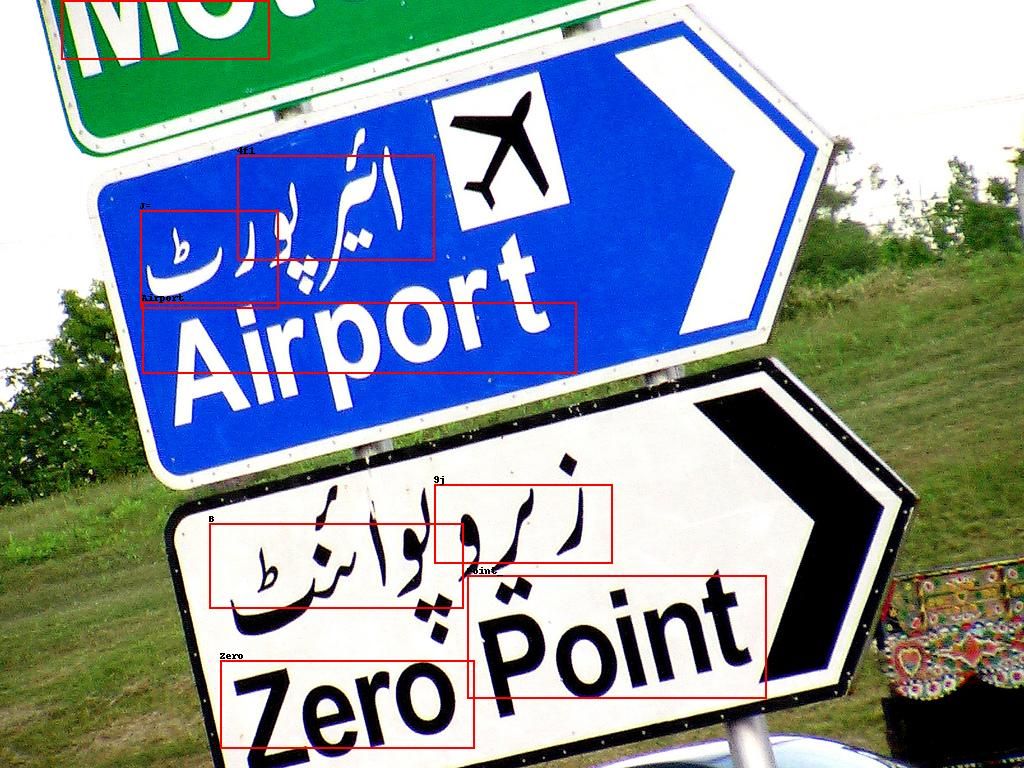

In [ ]:
from google.colab import drive
from google.colab import files

# Install easyocr
!pip install easyocr

!pip install seaborn

import easyocr
# from googletrans import Translator
from PIL import Image, ImageDraw, ImageFont
import tempfile
import os
import ipywidgets as widgets
from IPython.display import display, Image as IPImage




# Mount Google Drive
drive.mount('/content/drive')

# Global variable to store uploaded images
uploaded_images = []

# Function to perform OCR, translation, and display results
def perform_ocr_and_translation_and_display(images, lang='en', font_size=12):
    if not images:
        print("No images to process.")
        return

    temp_images = []
    annotated_images = []

    for image in images:
        # Save the image to a temporary file
        temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".jpg")
        temp_file_path = temp_file.name
        temp_images.append(temp_file_path)
        temp_file.write(image["content"])
        temp_file.close()

    results_list = []
    for temp_image_path in temp_images:
        detected_text, results, annotated_image = perform_ocr_and_translation(temp_image_path, lang, font_size)
        results_list.append((detected_text, results))
        annotated_images.append(annotated_image)

    # Display results
    for i, (detected_text, results) in enumerate(results_list):
        print(f"\nDetected Text (Image {i + 1}):")
        print(detected_text)

        # Save the annotated image
        save_path = os.path.splitext(temp_images[i])[0] + "_annotated.jpg"
        annotated_images[i].save(save_path, "JPEG")

        # Display the annotated image
        display(IPImage(filename=save_path))

# Function to perform OCR and translation
def perform_ocr_and_translation(image_path, lang='en', font_size=12):
    # Perform OCR using easyocr
    reader = easyocr.Reader([lang], gpu=False)  # Use GPU=True if you have a GPU
    results = reader.readtext(image_path)

    # Extract detected text
    detected_text = ' '.join([result[1] for result in results])

    # Display the image with annotated text
    annotated_image = display_annotated_image(image_path, results, font_size)

    return detected_text, results, annotated_image

# Function to display the image with annotated text
def display_annotated_image(image_path, results, font_size=12):
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)

    for result in results:
        # Extract bounding box coordinates
        bbox = result[0]

        # Draw bounding box if coordinates are available
        if bbox:
            # Convert bounding box coordinates to integers
            bbox = [int(coord) for point in bbox for coord in point]

            # Draw bounding box
            draw.rectangle([bbox[0], bbox[1], bbox[4], bbox[5]], outline="red", width=2)

            # Annotate text with specified font size
            font = ImageFont.load_default()  # You can customize the font as needed
            draw.text((bbox[0], bbox[1] - 10), result[1], fill="black", font=font)

    # Return the annotated image
    return img

# Function to handle file upload and update uploaded_images
def handle_upload(change):
    global uploaded_images
    uploaded_images = []

    for uploaded_file_name, uploaded_file_info in upload_btn.value.items():
        print("Uploaded file path:", uploaded_file_name)

        # Check file existence
        if not uploaded_file_info["content"]:
            print(f"Error: File '{uploaded_file_name}' not found.")
            continue

        uploaded_images.append(uploaded_file_info)

# GUI components
upload_btn = widgets.FileUpload(
    accept='.jpg',  # Specify accepted file types
    multiple=True
)

lang_dropdown = widgets.Dropdown(
    options=['English', 'Urdu'],
    value='English',
    description='Language:',
    disabled=False,
)

font_size_slider = widgets.IntSlider(
    value=12,
    min=8,
    max=24,
    step=1,
    description='Font Size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

run_ocr_btn = widgets.Button(
    description='Run OCR',
    disabled=False,
    button_style='info',  # You can customize the style
)

# Attach file upload handler
upload_btn.observe(handle_upload, names='value')

# Attach OCR button click event handler
run_ocr_btn.on_click(lambda b: perform_ocr_and_translation_and_display(uploaded_images, lang='en' if lang_dropdown.value == 'English' else 'ur', font_size=font_size_slider.value))

# Display GUI components
display(upload_btn)
display(lang_dropdown)
display(font_size_slider)
display(run_ocr_btn)

# New Section